# Dependencias temporales

In [131]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
#df.columns.tolist()

In [139]:
# Force datetime on the `tweet_created` column
df.tweet_created = pd.to_datetime(df.tweet_created)
# Add extra column with weekday_name
df['day_of_week'] = df['tweet_created'].dt.weekday
df.head(4)

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,day_of_week
tweet_id,,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin,0
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN,5
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN,5
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada),3


In [133]:
# Force the index to be the creation date
df2 = df.set_index('tweet_created')
# Select only airline_sentiment and create a one-hot encoding.
sent_sentiment = pd.get_dummies(df2['airline_sentiment'])
sent_sentiment.head()

,negative,neutral,positive
tweet_created,,,
2017-12-18 13:07:04,0,0,1
2017-11-04 17:05:11,0,0,1
2017-12-02 15:24:09,0,1,0
2017-12-21 23:17:43,1,0,0
2017-12-06 00:44:25,1,0,0


Cuando se produjeron el mayor número de tweets (por categorias)?

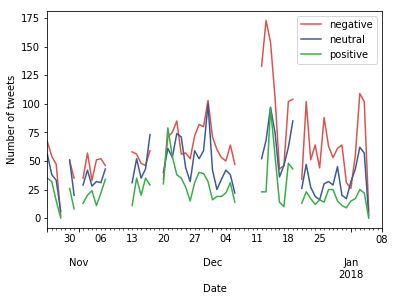

In [134]:
time_histogram = sent_sentiment.groupby(pd.TimeGrouper('D')).sum()

# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"], 
                      sns.xkcd_rgb["medium green"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')

In [135]:
# Force the day of week to be the index
df2 = df.set_index('day_of_week')
# Select only airline_sentiment and create a one-hot encoding.
sent_sentiment = pd.get_dummies(df2['airline_sentiment'])
sent_sentiment.head()

,negative,neutral,positive
day_of_week,,,
0,0,0,1
5,0,0,1
5,0,1,0
3,1,0,0
2,1,0,0


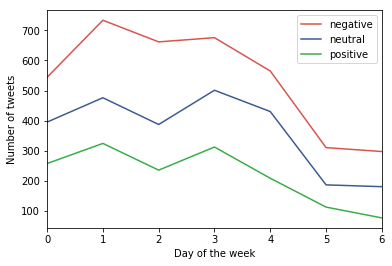

In [136]:
time_histogram = sent_sentiment.groupby('day_of_week').sum()

# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"], 
                      sns.xkcd_rgb["medium green"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Day of the week')

In [137]:
time_histogram

,negative,neutral,positive
day_of_week,,,
0,544.0,395.0,257.0
1,734.0,476.0,324.0
2,662.0,387.0,235.0
3,676.0,501.0,312.0
4,565.0,430.0,208.0
5,310.0,186.0,112.0
6,297.0,180.0,76.0


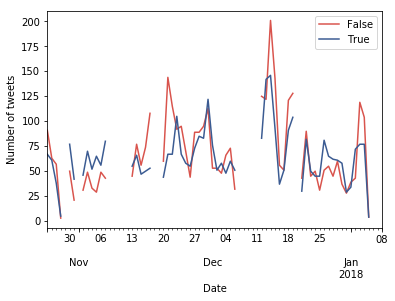

In [138]:
# Select only is_reply
df_date_sent = df_by_date[['is_reply']]
# Create a one-hot encoding.
sent_onehot = pd.get_dummies(df_date_sent['is_reply'])
sent_onehot.head()

time_histogram = sent_onehot.groupby(pd.TimeGrouper('D')).sum()

import seaborn as sns
# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')